<a href="https://colab.research.google.com/github/Aman73yadav/cli/blob/main/Copy_of_Algorithms_and_Analysis_5_Lab_Experiments_by_Aman(2024185718).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx

In [ ]:
pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.14.0.32.55
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread      

In [ ]:
import networkx as nx
G = nx.DiGraph()
G.add_edges_from([(0,3),(0,6),(1,3),(2,4),(2,8),(3,6),(3,7),(4,3),(4,7),(4,8),(5,4),(5,8),(6,9),(6,7),(7,10),(8,11),(9,10),(9,12),(10,12),(10,14),(11,14),(13,14)])

In [ ]:
def dfs(graph, vertex, visited, stack, path):
    visited.add(vertex)
    path.add(vertex)
    for neighbor in graph[vertex]:
        if neighbor in path or (neighbor not in visited and not dfs(graph, neighbor, visited, stack, path)):
            return False
    stack.append(vertex)
    path.remove(vertex)
    return True

In [ ]:
def topological_sort(graph):
    visited = set()
    path = set()
    stack = []
    for vertex in graph:
        if vertex not in visited:
            if not dfs(graph, vertex, visited, stack, path):
                return []
    ordering = []
    while stack:
        ordering.append(stack.pop())
    return ordering

In [ ]:
result = topological_sort(G)
print("topological ordering =",result)

topological ordering = [13, 5, 2, 4, 8, 11, 1, 0, 3, 6, 7, 9, 10, 14, 12]


In [ ]:
!pip install graphviz==0.20.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3


In [ ]:
!apt-get update  # Update package lists
!apt-get install graphviz graphviz-dev -y  # Install Graphviz and its development headers

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,032 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,372 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Package

In [ ]:
!pip install --force-reinstall pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.14-cp310-cp310-linux_x86_64.whl size=168638 sha256=9c6a3832b14779d065586544c7a5093b65692e1f5441f0d6d5fae2de7672d256
  Stored in directory: /root/.cache/pip/wheels/61/ab/cd/e24a22c32830b8b4948c8887d8714d399f0f806f206a034698
Successfully built pygraphviz


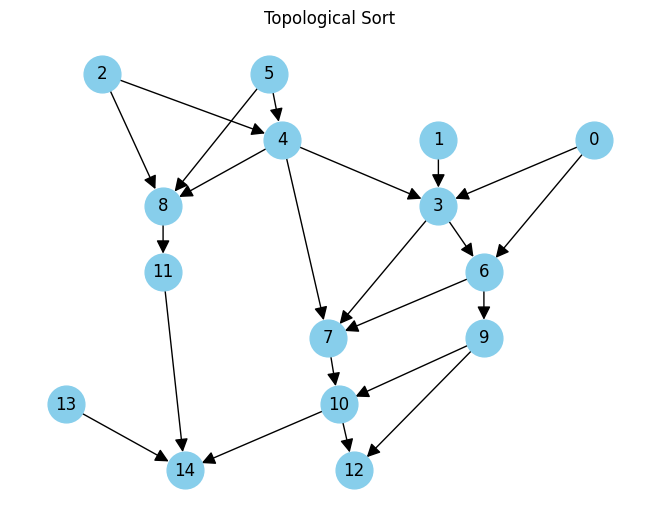

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout # This line requires pygraphviz

# Your existing code for topological_sort and G
G = nx.DiGraph()
G.add_edges_from([(0,3),(0,6),(1,3),(2,4),(2,8),(3,6),(3,7),(4,3),(4,7),(4,8),(5,4),(5,8),(6,9),(6,7),(7,10),(8,11),(9,10),(9,12),(10,12),(10,14),(11,14),(13,14)])

def dfs(graph, vertex, visited, stack, path):
    visited.add(vertex)
    path.add(vertex)
    for neighbor in graph[vertex]:
        if neighbor in path or (neighbor not in visited and not dfs(graph, neighbor, visited, stack, path)):
            return False
    stack.append(vertex)
    path.remove(vertex)
    return True

def topological_sort(graph):
    visited = set()
    path = set()
    stack = []
    for vertex in graph:
        if vertex not in visited:
            if not dfs(graph, vertex, visited, stack, path):
                return []
    ordering = []
    while stack:
        ordering.append(stack.pop())
    return ordering

# Perform topological sort
result = topological_sort(G)

# Create a new graph for visualization, with nodes in topological order
sorted_G = nx.DiGraph()
sorted_G.add_nodes_from(result)

# Add edges, respecting the topological order
for u in result:
    for v in G.neighbors(u):
        if v in result and result.index(u) < result.index(v):
            sorted_G.add_edge(u, v)

# Use Graphviz for layout and draw the graph
pos = graphviz_layout(sorted_G, prog="dot")  # This line uses the installed pygraphviz
nx.draw(sorted_G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=12, arrowsize=20)
plt.title("Topological Sort")
plt.show()

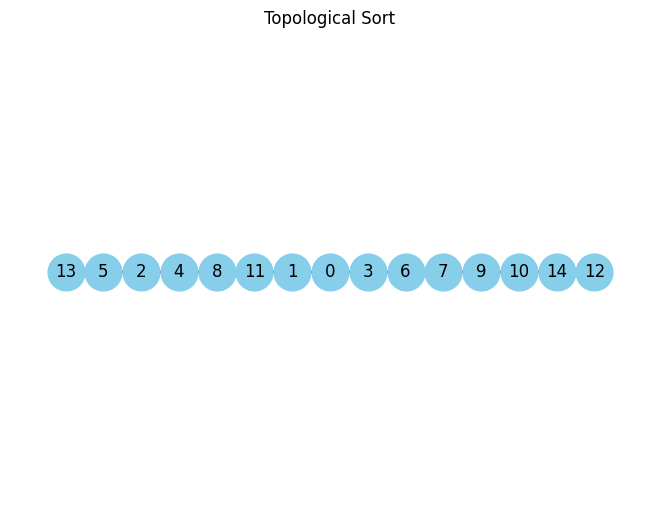

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# ... (Your existing code for topological_sort and G) ...

# Given topological ordering
result = [13, 5, 2, 4, 8, 11, 1, 0, 3, 6, 7, 9, 10, 14, 12]

# Create a new graph for visualization, with nodes in topological order
sorted_G = nx.DiGraph()
sorted_G.add_nodes_from(result)

# Add edges, respecting the topological order
for u in result:
    for v in G.neighbors(u):
        if v in result and result.index(u) < result.index(v):  # Respect topological order
            sorted_G.add_edge(u, v)

# Visualize the graph
pos = {node: (result.index(node), 0) for node in result}  # Assign x-coordinates based on order
nx.draw(sorted_G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=12, arrowsize=20)
plt.title("Topological Sort")
plt.show()

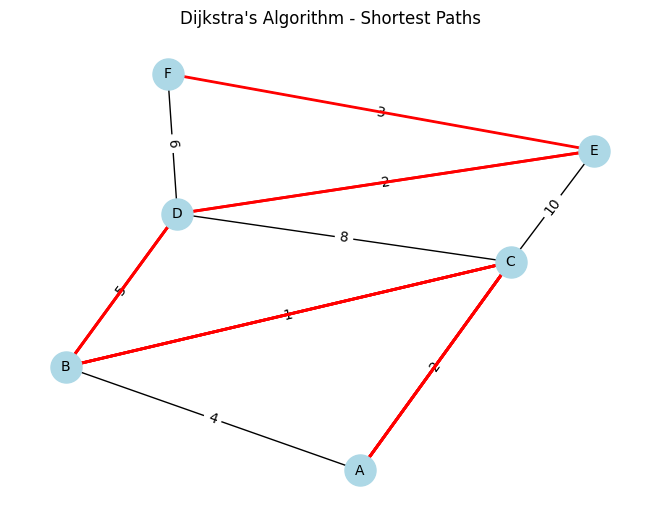

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra(graph, start_node):
    """
    Finds the shortest paths from a starting node to all other nodes in a graph.

    Args:
        graph: A NetworkX graph representing the edge-weighted graph.
        start_node: The starting node for the shortest path calculations.

    Returns:
        A dictionary containing the shortest distances from the start_node to all other nodes.
    """

    distances = {node: float('inf') for node in graph.nodes()}  # Initialize distances to infinity
    distances[start_node] = 0  # Set distance from start_node to itself to 0
    visited = set()

    while len(visited) < len(graph.nodes()):
        current_node = min((node for node in graph.nodes() if node not in visited), key=distances.get)
        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            distance = distances[current_node] + graph[current_node][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance

    return distances

# Example Graph
graph = nx.Graph()
graph.add_edges_from([
    ('A', 'B', {'weight': 4}),
    ('A', 'C', {'weight': 2}),
    ('B', 'C', {'weight': 1}),
    ('B', 'D', {'weight': 5}),
    ('C', 'D', {'weight': 8}),
    ('C', 'E', {'weight': 10}),
    ('D', 'E', {'weight': 2}),
    ('D', 'F', {'weight': 6}),
    ('E', 'F', {'weight': 3}),
])

# Run Dijkstra's algorithm
start_node = 'A'
shortest_distances = dijkstra(graph, start_node)

# Visualization
pos = nx.spring_layout(graph)  # Choose a layout for the graph
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=nx.get_edge_attributes(graph, 'weight'))

# Highlight shortest paths
for node in graph.nodes():
    if node != start_node:
        path = nx.shortest_path(graph, source=start_node, target=node, weight='weight')
        nx.draw_networkx_edges(graph, pos, edgelist=[(path[i], path[i + 1]) for i in range(len(path) - 1)], edge_color='red', width=2)

plt.title("Dijkstra's Algorithm - Shortest Paths")
plt.show()

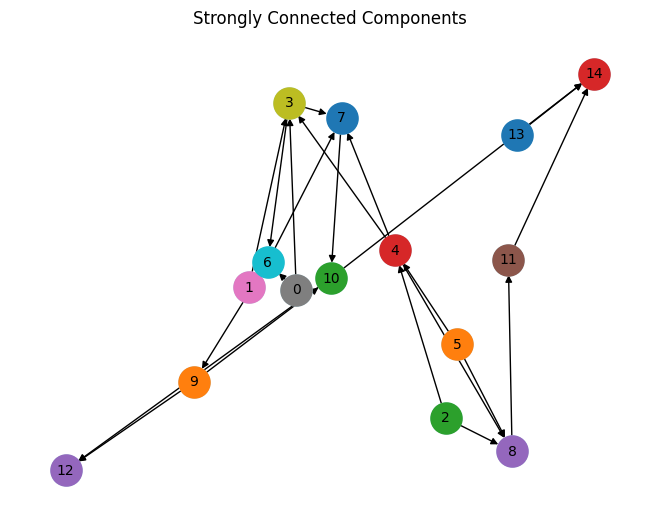

In [ ]:
import networkx as nx

def kosaraju(graph):
    """
    Finds strongly connected components (SCCs) using Kosaraju's algorithm.

    Args:
        graph: A NetworkX DiGraph representing the directed graph.

    Returns:
        A list of lists, where each inner list represents an SCC.
    """

    def dfs1(node, visited, stack):
        visited.add(node)
        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                dfs1(neighbor, visited, stack)
        stack.append(node)

    def dfs2(node, visited, component):
        visited.add(node)
        component.append(node)
        for neighbor in graph_rev.neighbors(node):
            if neighbor not in visited:
                dfs2(neighbor, visited, component)

    visited = set()
    stack = []
    for node in graph.nodes():
        if node not in visited:
            dfs1(node, visited, stack)

    graph_rev = graph.reverse()
    visited = set()
    sccs = []
    while stack:
        node = stack.pop()
        if node not in visited:
            component = []
            dfs2(node, visited, component)
            sccs.append(component)

    return sccs

# Example Usage (using your graph G):
G = nx.DiGraph()
G.add_edges_from([(0,3),(0,6),(1,3),(2,4),(2,8),(3,6),(3,7),(4,3),(4,7),(4,8),(5,4),(5,8),(6,9),(6,7),(7,10),(8,11),(9,10),(9,12),(10,12),(10,14),(11,14),(13,14)])

sccs = kosaraju(G)

# Visualization using NetworkX and Matplotlib
pos = nx.spring_layout(G)  # Choose a layout for the graph

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)

# Highlight SCCs with different colors
for i, scc in enumerate(sccs):
    nx.draw_networkx_nodes(G, pos, nodelist=scc, node_color=f'C{i}', node_size=500)

plt.title("Strongly Connected Components")
plt.show()

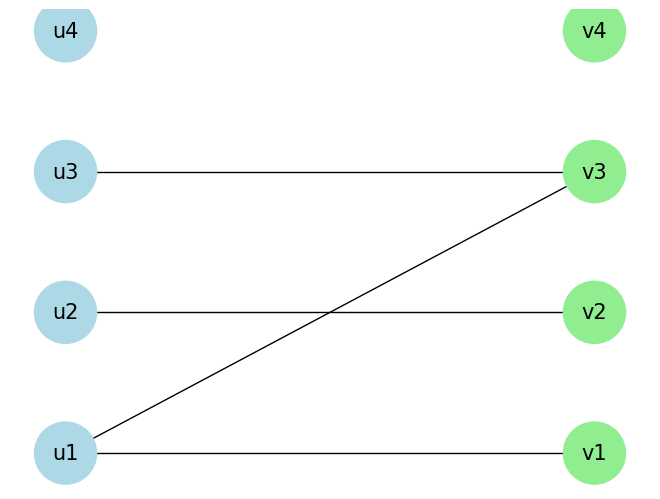

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

B = nx.Graph()

U = ['u1', 'u2', 'u3','u4']
V = ['v1', 'v2', 'v3','v4']

B.add_nodes_from(U, bipartite=0)
B.add_nodes_from(V, bipartite=1)

edges = [('u1', 'v1'), ('u2', 'v2'), ('u3', 'v3'), ('u1', 'v3')]
B.add_edges_from(edges)

pos = nx.bipartite_layout(B, U)
nx.draw(B, pos, with_labels=True, node_color=['lightblue']*len(U) + ['lightgreen']*len(V), node_size=2000, font_size=15)
plt.show()

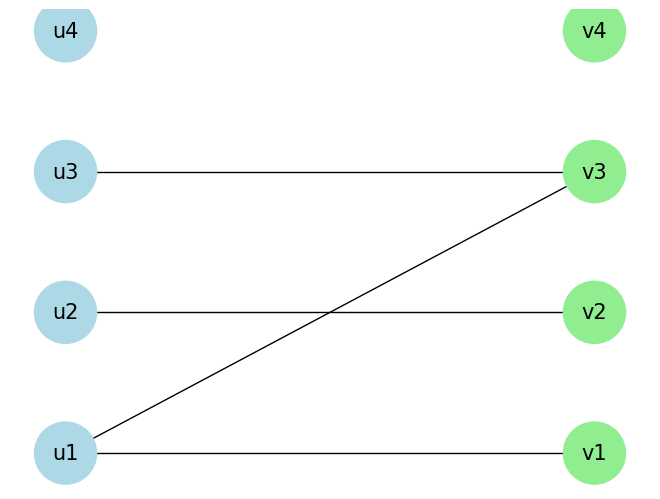

Perfect Matching: {'u3': 'v3', 'u1': 'v1', 'u2': 'v2'}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

B = nx.Graph()

U = ['u1', 'u2', 'u3','u4']
V = ['v1', 'v2', 'v3','v4']

B.add_nodes_from(U, bipartite=0)
B.add_nodes_from(V, bipartite=1)

edges = [('u1', 'v1'), ('u2', 'v2'), ('u3', 'v3'), ('u1', 'v3')]
B.add_edges_from(edges)

pos = nx.bipartite_layout(B, U)
nx.draw(B, pos, with_labels=True, node_color=['lightblue'] * len(U) + ['lightgreen'] * len(V), node_size=2000, font_size=15)
plt.show()

# Explicitly specify top_nodes when calling maximum_matching
matching = nx.algorithms.bipartite.matching.maximum_matching(B, top_nodes=U)
# U is the set of nodes in one bipartite set

# Assuming top_nodes is defined somewhere (likely U in this case)
perfect_matching = {min(k, v): max(k, v) for k, v in matching.items() if k in U}

print("Perfect Matching:", perfect_matching)

In [ ]:
!pip install networkx==3.1

In [ ]:
import networkx as nx

def edmonds_blossom(graph, top_nodes):
    """
    Finds a maximum cardinality matching in a bipartite graph using Edmond's Blossom algorithm.
    """
    matching = nx.bipartite.matching.hopcroft_karp_matching(graph, top_nodes)
    return matching

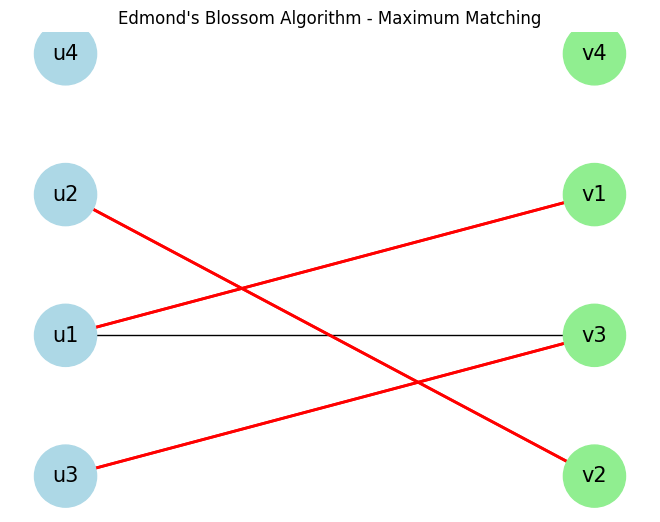

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a bipartite graph
B = nx.Graph()
U = ['u1', 'u2', 'u3', 'u4']  # Nodes in one partition
V = ['v1', 'v2', 'v3', 'v4']  # Nodes in the other partition
B.add_nodes_from(U, bipartite=0)
B.add_nodes_from(V, bipartite=1)
edges = [('u1', 'v1'), ('u2', 'v2'), ('u3', 'v3'), ('u1', 'v3')]
B.add_edges_from(edges)

# Find maximum matching using Edmond's Blossom algorithm
matching = edmonds_blossom(B, U)

# Highlight the matching edges
pos = nx.bipartite_layout(B, U)
nx.draw(B, pos, with_labels=True, node_color=['lightblue'] * len(U) + ['lightgreen'] * len(V), node_size=2000, font_size=15)
nx.draw_networkx_edges(B, pos, edgelist=matching.items(), edge_color='red', width=2)
plt.title("Edmond's Blossom Algorithm - Maximum Matching")
plt.show()

In [ ]:
def find_augmenting_path(graph, matching, top_nodes):
    """
    Finds an augmenting path in a bipartite graph.
    """
    # Create a directed graph from the original graph and matching
    directed_graph = nx.DiGraph(graph)
    for u, v in matching.items():
        directed_graph.add_edge(u, v)
        directed_graph.add_edge(v, u)

    # Find an exposed node in the top partition
    exposed_node = None
    for node in top_nodes:
        if node not in matching:
            exposed_node = node
            break

    if exposed_node is None:
        return None  # No augmenting path if no exposed node

    # Perform a depth-first search to find an augmenting path
    visited = set()
    path = []

    def dfs(node, is_matched_edge):
        visited.add(node)
        path.append(node)

        if node not in top_nodes and node not in matching:
            return True  # Found an exposed node in the bottom partition

        for neighbor in directed_graph.neighbors(node):
            if (node, neighbor) not in matching.items() and (neighbor not in visited or (neighbor == exposed_node and is_matched_edge)):
                if dfs(neighbor, not is_matched_edge):
                    return True

        path.pop()
        return False

    if dfs(exposed_node, False):
        return path

    return None  # No augmenting path found

augmenting_path = find_augmenting_path(B, matching, U)
print(f"Augmenting path: {augmenting_path}")

Augmenting path: None
